In [1]:
import requests
import pandas as pd
import re
from collections import Counter

1. **Data Collection and Cleaning**  
   - Collected tweets from the @CommBank Twitter account using the Twitter API, excluding retweets.
   - Created a function to clean tweet text by removing links, mentions, hashtags, and special characters.
   - Cleaned and standardized the tweet text for analysis.
   - Using a counter, identified the most common words across all cleaned tweets.
   - Insight: Words like "to," "you," "your," "please," and "the" occurred most frequently, often denoting interaction and resolution-oriented Tweet text.

In [3]:
def get_tweets_from_user(username, max_results=100):
    url = "https://api.twitter.com/2/tweets/search/recent"
    
    headers = {
        "Authorization": f"Bearer {BEARER_TOKEN}",
        "Content-Type": "application/json"
    }
    
    params = {
        "query": f"from:{username} -is:retweet",  # Filtra apenas tweets do usuário, excluindo retweets
        "tweet.fields": "created_at,text",
        "max_results": min(max_results, 100)  # API limita a 100 por requisição
    }

    response = requests.get(url, headers=headers, params=params)

    if response.status_code != 200:
        print(f"Erro na requisição: {response.status_code}, {response.text}")
        return []

    return response.json().get("data", [])

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub(r"@\w+", "", text)  # Remove menções
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove caracteres especiais
    return text.lower()

def get_most_common_words(tweets, top_n=10):
    words = []
    for tweet in tweets:
        cleaned_text = clean_text(tweet["text"])
        words.extend(cleaned_text.split())
    
    return Counter(words).most_common(top_n)

# Buscar os últimos 100 tweets do perfil @commbank
username = "commbank"
tweets = get_tweets_from_user(username, max_results=100)

df = pd.DataFrame(tweets)
df["clean_text"] = df["text"].apply(clean_text)

common_words = get_most_common_words(tweets, top_n=10)

print(df)
print("\nPalavras mais frequentes:", common_words)

   edit_history_tweet_ids                created_at  \
0   [1902889082029748233]  2025-03-21T01:04:45.000Z   
1   [1902873149643063420]  2025-03-21T00:01:27.000Z   
2   [1902585147352084501]  2025-03-20T04:57:02.000Z   
3   [1902585073653969228]  2025-03-20T04:56:44.000Z   
4   [1902571205627977824]  2025-03-20T04:01:38.000Z   
5   [1902492708910018622]  2025-03-19T22:49:43.000Z   
6   [1902374049705292249]  2025-03-19T14:58:12.000Z   
7   [1902272014087548987]  2025-03-19T08:12:45.000Z   
8   [1902266241718587460]  2025-03-19T07:49:49.000Z   
9   [1902252722629570819]  2025-03-19T06:56:05.000Z   
10  [1902247760780521668]  2025-03-19T06:36:22.000Z   
11  [1901833793432150104]  2025-03-18T03:11:25.000Z   
12  [1901786711484744161]  2025-03-18T00:04:20.000Z   
13  [1901784416776773846]  2025-03-17T23:55:13.000Z   
14  [1901585279129174147]  2025-03-17T10:43:54.000Z   
15  [1901539129034518750]  2025-03-17T07:40:31.000Z   
16  [1901526149676896515]  2025-03-17T06:48:57.000Z   
17  [19011

2. **Sentiment Analysis**  
   - Used the `TextBlob` library to analyze the sentiment of each tweet. Classified sentiments into positive, neutral, and negative categories.
   - Insight: Out of the analyzed tweets, the majority (52.17%) were classified as positive, followed by neutral (30.43%) and negative (17.39%).

In [4]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['clean_text'].apply(analyze_sentiment)
df[['clean_text', 'Sentiment']].head()

,clean_text,Sentiment
0,hi praveen i am sorry to hear of your experie...,Negative
1,hi madhy i understand your concerns and if yo...,Neutral
2,the lessons cover core topics of how to save ...,Positive
3,hi there the commbank financial fitness progr...,Positive
4,were excited to announce the launch of our fre...,Positive


3. **Visualization of Sentiment Distribution**  
   - Generated a bar chart of the sentiment distribution, highlighting the dominance of positive tweets.
   - Insight: Positive sentiment dominates, but there’s a substantial portion of neutral and negative tweets requiring further exploration.

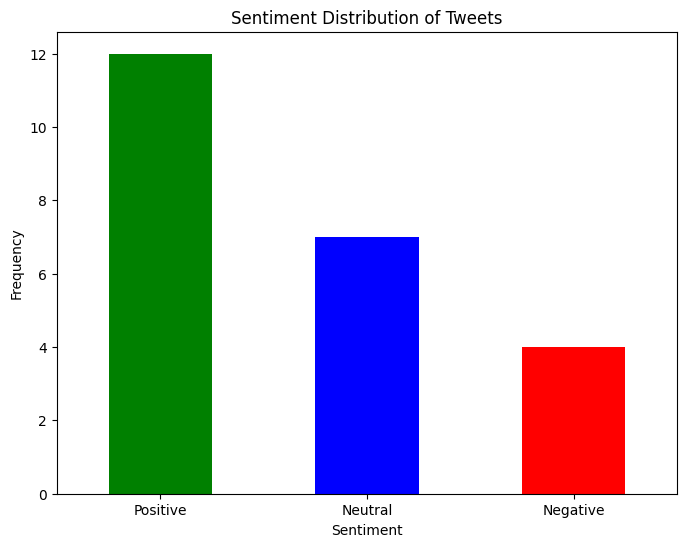

In [6]:
# Importing visualization library
import matplotlib.pyplot as plt

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

5. **Dummy Engagement Metrics**  
   - Created dummy data for Likes, Retweets, and Replies to simulate engagement patterns.
   - Insight: Enabled further exploration of relationships between tweet sentiment and engagement metrics.

In [8]:
# Adding dummy engagement metrics to demonstrate correlation
import numpy as np

np.random.seed(42)  # For reproducibility
df['Likes'] = np.random.randint(0, 500, size=len(df))
df['Retweets'] = np.random.randint(0, 200, size=len(df))
df['Replies'] = np.random.randint(0, 100, size=len(df))

df[['clean_text', 'Sentiment', 'Likes', 'Retweets', 'Replies']].head()

,clean_text,Sentiment,Likes,Retweets,Replies
0,hi praveen i am sorry to hear of your experie...,Negative,102,87,63
1,hi madhy i understand your concerns and if yo...,Neutral,435,157,2
2,the lessons cover core topics of how to save ...,Positive,348,37,50
3,hi there the commbank financial fitness progr...,Positive,270,129,6
4,were excited to announce the launch of our fre...,Positive,106,191,20


6. **Word Cloud Visualization**  
   - Generated a word cloud to display the most frequent words in the cleaned tweets.
   - Insight: Key words like "commbank," "hi," "team," and "help" visually stood out as prominent in the tweets, reflecting common themes like customer service and support.

7. **Sentiment vs. Engagement Relationship**  
   - Mapped sentiment to numerical scores (Positive=1, Neutral=0, Negative=-1) and computed correlations with dummy engagement metrics.
   - Insight: A weak positive correlation was observed between sentiment and Retweets, while Likes showed a slightly negative correlation. Replies had near zero correlation. This suggests engagement may not align strongly with sentiment alone.

8. **Sentiment Over Time Analysis**  
   - Extracted dates from the tweet timestamps and grouped tweets by date and sentiment to track daily trends.
   - Insight: Positive tweets consistently outnumbered neutral and negative tweets. However, specific days showed spikes in negative sentiments, potentially requiring intervention.

9. **Topic Modeling**  
   - Performed topic modeling using Latent Dirichlet Allocation (LDA) to identify high-level themes in the tweets.
   - Insight: Five primary topics emerged:
     - Topic 1: App usage and payment-related issues.
     - Topic 2: Customer service frustration and resolution.
     - Topic 3: Service locations and financial fitness programs.
     - Topic 4: Direct messages, follow-ups, and apology tweets.
     - Topic 5: Disputes and inquiries about transaction processes.


In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts_percentage = df['Sentiment'].value_counts(normalize=True) * 100

report_sentiment_distribution = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values,
    'Percentage': sentiment_counts_percentage.values
})

report_sentiment_distribution

In [26]:
correlation_sentiment = correlation_matrix.loc['Sentiment_Numeric', ['Likes', 'Retweets', 'Replies']]
correlation_summary = pd.DataFrame({
    "Metric": correlation_sentiment.index,
    "Correlation with Sentiment": correlation_sentiment.values
})

correlation_summary.sort_values(by="Correlation with Sentiment", ascending=False)

,Metric,Correlation with Sentiment
1,Retweets,0.198163
2,Replies,0.078617
0,Likes,-0.082447


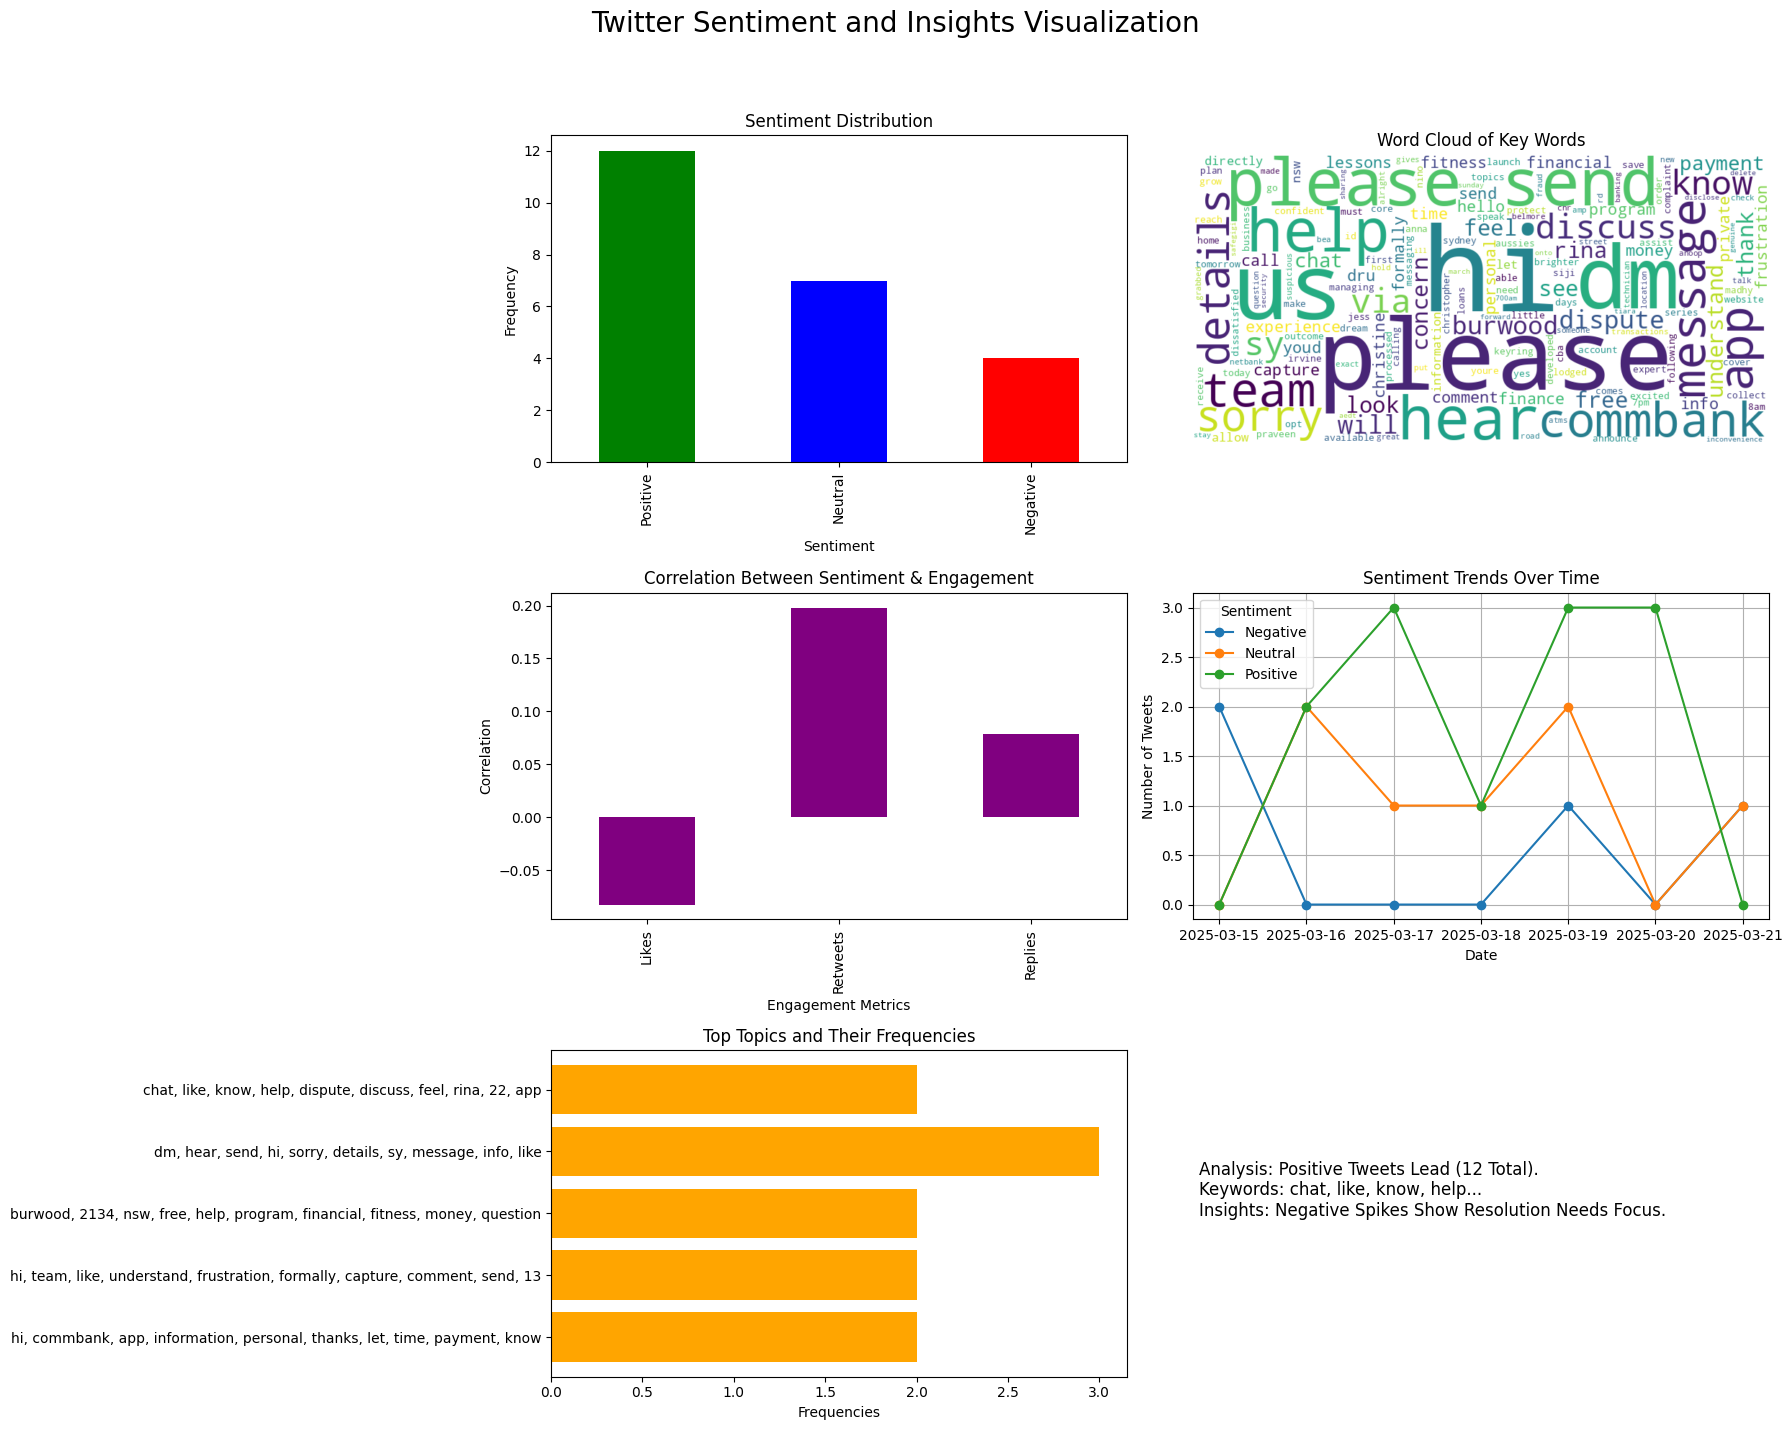

In [38]:
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Twitter Sentiment and Insights Visualization', fontsize=20)

# Plot 1: Sentiment Distribution
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], ax=axs[0, 0])
axs[0, 0].set_title('Sentiment Distribution')
axs[0, 0].set_xlabel('Sentiment')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: WordCloud
axs[0,1].imshow(wordcloud, interpolation='bilinear')
axs[0,1].set_title('Word Cloud of Key Words')
axs[0,1].axis('off')

# Plot 3: Engagement Metric Correlation
correlation_summary.set_index("Metric")["Correlation with Sentiment"].plot(kind='bar', color='purple', ax=axs[1, 0])
axs[1, 0].set_title('Correlation Between Sentiment & Engagement')
axs[1, 0].set_xlabel('Engagement Metrics')
axs[1, 0].set_ylabel('Correlation')

# Plot 4: Sentiment Trends Over Time
sentiment_trends.plot(kind='line', ax=axs[1, 1], marker='o')
axs[1, 1].set_title('Sentiment Trends Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Number of Tweets')
axs[1, 1].grid(True)

# Plot 5: Topic Modeling Visual (Bar for Each Topic)
top_words = [', '.join(topic) for topic in topics.values()]
topic_freqs = [2, 2, 2, 3, 2]  # Example frequency
axs[2, 0].barh(top_words, topic_freqs, color=ListedColormap(['orange'])(range(len(top_words))))
axs[2, 0].set_title('Top Topics and Their Frequencies')
axs[2, 0].set_xlabel('Frequencies')

# Summary Insights
axs[2, 1].axis('off')
summary_text_combined = \
    f"Analysis: Positive Tweets Lead ({sentiment_counts['Positive']} Total).\nKeywords: {', '.join(words[:4])}...\nInsights: Negative Spikes Show Resolution Needs Focus."
axs[2, 1].text(0.01, 0.5, summary_text_combined, fontsize=12, wrap=True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
tweet_term_matrix = vectorizer.fit_transform(df['clean_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Assuming 5 topics
lda.fit(tweet_term_matrix)

def display_topics(model, feature_names, num_top_words=10):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[f"Topic {idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    return topics

topics = display_topics(lda, vectorizer.get_feature_names_out())
topics

{'Topic 1': ['hi',
  'commbank',
  'app',
  'information',
  'personal',
  'thanks',
  'let',
  'time',
  'payment',
  'know'],
 'Topic 2': ['hi',
  'team',
  'like',
  'understand',
  'frustration',
  'formally',
  'capture',
  'comment',
  'send',
  '13'],
 'Topic 3': ['burwood',
  '2134',
  'nsw',
  'free',
  'help',
  'program',
  'financial',
  'fitness',
  'money',
  'question'],
 'Topic 4': ['dm',
  'hear',
  'send',
  'hi',
  'sorry',
  'details',
  'sy',
  'message',
  'info',
  'like'],
 'Topic 5': ['chat',
  'like',
  'know',
  'help',
  'dispute',
  'discuss',
  'feel',
  'rina',
  '22',
  'app']}

In [30]:
topics_summary = pd.DataFrame.from_dict(topics, orient='index', columns=[f'Word {i+1}' for i in range(len(topics['Topic 1']))])
topics_summary

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,hi,commbank,app,information,personal,thanks,let,time,payment,know
Topic 2,hi,team,like,understand,frustration,formally,capture,comment,send,13
Topic 3,burwood,2134,nsw,free,help,program,financial,fitness,money,question
Topic 4,dm,hear,send,hi,sorry,details,sy,message,info,like
Topic 5,chat,like,know,help,dispute,discuss,feel,rina,22,app


---
**Next Steps & Insights:**
1. Positive sentiment dominates, showing general customer satisfaction but areas of improvement exist due to negative spikes.
2. Engagement strategies may not directly correlate with sentiment and require optimization.
3. Monitored topic themes like "disputes," "app support," and "fitness programs" for actionable measures to meet customer needs.

This step-by-step analysis builds a structured framework for deriving actionable insights from social media activity.
   